# Business Problem
 - What we are and what we are trying to accomplish.

Type Markdown and LaTeX:  𝛼2

In [1]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Visual Studio
 - Importing two functions.
  - The ut function evaluates the amount of error between model's predication and the actual values for both train and test set
  - The rf function allows testing for the dependent variable with multiple variables or a single one.

In [2]:
# Created and imported from visual studio.
import utilities as ut
import regressionfunc as rf
from sklearn.preprocessing import StandardScaler

## Files
 - Just a quick glance at what I am working with.

In [3]:
!ls

CONTRIBUTING.md            README.md
Data exploration (3).ipynb Untitled.ipynb
Data exploration.ipynb     __pycache__
Iron.ipynb                 ap.png
LICENSE.md                 data
Price_Bath.png             halfway-there.gif
Price_Bed.png              pairplor.png
Price_Built.png            price_floors_fit.png
Price_Comp.png             price_sqft_living_fit.png
Price_Floors.png           regressionfunc.py
Price_Living.png           utilities.py
Price_PSQFT.png            utlities.py
Price_Year.png


In [4]:
df = pd.read_csv('data/kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

## Exploring the Categorical Variables
 - Checking for things such as:
  - The count of different cells in a column.
  - Unique cells within a column, etc.

In [5]:
# Explore Categorical Columns

cat_cols = [c for c in df. columns if df[c].dtype == 'object']
df[cat_cols].describe()

date waterfront   view condition      grade sqft_basement
count       21597      19221  21534     21597      21597         21597
unique        372          2      5         5         11           304
top     6/23/2014         NO   NONE   Average  7 Average           0.0
freq          142      19075  19422     14020       8974         12826

## Info
 - Check out the data.
 - Look to see if there are any abnormalities.
 - Discover what columns might be worth investigating further.

In [6]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

## Columns
 - What data is contained in the cells.

In [7]:
# This column has a few variables that make it top heavy.

df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

### Waterfront Variable
 - Categorical Variable.
  - Is there anthing interesting with it.

In [8]:
# This is interesting because there are so few Yes cells compared to no.

df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [9]:
df['waterfront'].describe()

count     19221
unique        2
top          NO
freq      19075
Name: waterfront, dtype: object

### Bedrooms
 - Bedroom count is significant.
 - It can really be understood when looking at the quartiles and standard deviation.

In [10]:
# A lot of the houses have between 2 and 5 bedrooms.
# This would indicate the data has a lot of single family homes.

df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

### Creating New Columns
 - Calculate new columns based on independent variables that can be combined.

In [12]:
df['Bath_SQFT'] = df['sqft_living'] / df['bathrooms']
df['Bedrooms_SQFT'] = df['sqft_living'] / df['bedrooms']
df['BathroomsPerBedrooms'] = df['bathrooms'] / df['bedrooms']
df['Perc_Liv_Space_Above'] = df['sqft_above'] / df['sqft_living']
df['LS_Per_FL'] = df['sqft_living'] / df['floors']
df['LivSp_Per_Lot'] = df['sqft_living'] / df['sqft_lot']

df.round(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...    lat    long  sqft_living15  \
0          5650     1.0        NaN  NONE  ...  47.51 -122.26           1340   
1          7242     2.0         NO  NONE  ...  47.72 -122.32           1690   
2         10000     1.0         NO  NONE  ...  47.74 -122.23           2720   
3          5000     1.0         NO  NONE  ...  47.52 -122.39           1360   
4          8080     1.0         NO  NONE  ...  47.62 -122.04           1800   
...         ...     ...        ...   ...  ...    ...     ...            ...   
21592      1131     3.0         NO  NONE  ...  47.70 -122.35           1530   
21593      5813     2.0         NO  NONE  ...  47.51 -122.36           1830   
21594      1350     2.0         NO  NONE  ...  47.59 -122.30           1020   
21595      2388     2.0        NaN  NONE  ...  47.53 -122.07           1410   
21596      1076     2.0         NO  NONE  ...  47.59 -122.30           1020   

      sqft_lot15  Bath_SQFT  Bedrooms_SQFT  BathroomsPerBedrooms  \
0           5650    1180.00         393.33                  0.33   
1           7639    1142.22         856.67                  0.75   
2           8062     770.00         385.00                  0.50   
3           5000     653.33         490.00                  0.75   
4           7503     840.00         560.00                  0.67   
...          ...        ...            ...                   ...   
21592       1509     612.00         510.00                  0.83   
21593       7200     924.00         577.50                  0.62   
21594       2007    1360.00         510.00                  0.38   
21595       1287     640.00         533.33                  0.83   
21596       1357    1360.00         510.00                  0.38   

       Perc_Liv_Space_Above  LS_Per_FL  LivSp_Per_Lot  
0                      1.00     1180.0           0.21  
1                      0.84     1285.0           0.35  
2                      1.00      770.0           0.08  
3                      0.54     1960.0           0.39  
4                      1.00     1680.0           0.21  
...                     ...        ...            ...  
21592                  1.00      510.0           1.35  
21593                  1.00     1155.0           0.40  
21594                  1.00      510.0           0.76  
21595                  1.00      800.0           0.67  
21596                  1.00      510.0           0.95  

[21597 rows x 27 columns]

### Discovering the Type of Data
 - What do the columns contain?
 - What Dtype are they?
 - Are there any NaN values, empty cells or null values.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21597 non-null  int64  
 1   date                  21597 non-null  object 
 2   price                 21597 non-null  float64
 3   bedrooms              21597 non-null  int64  
 4   bathrooms             21597 non-null  float64
 5   sqft_living           21597 non-null  int64  
 6   sqft_lot              21597 non-null  int64  
 7   floors                21597 non-null  float64
 8   waterfront            19221 non-null  object 
 9   view                  21534 non-null  object 
 10  condition             21597 non-null  object 
 11  grade                 21597 non-null  object 
 12  sqft_above            21597 non-null  int64  
 13  sqft_basement         21597 non-null  object 
 14  yr_built              21597 non-null  int64  
 15  yr_renovated       

In [14]:
df.isna().sum()

id                         0
date                       0
price                      0
bedrooms                   0
bathrooms                  0
sqft_living                0
sqft_lot                   0
floors                     0
waterfront              2376
view                      63
condition                  0
grade                      0
sqft_above                 0
sqft_basement              0
yr_built                   0
yr_renovated            3842
zipcode                    0
lat                        0
long                       0
sqft_living15              0
sqft_lot15                 0
Bath_SQFT                  0
Bedrooms_SQFT              0
BathroomsPerBedrooms       0
Perc_Liv_Space_Above       0
LS_Per_FL                  0
LivSp_Per_Lot              0
dtype: int64

## Train-Test Split
 - Splitting the data in two so that we have a train set that can be tested against.
 - This exercise is so that the data can be tested against how well the machine learned it.
 - Dropping id column because it is not necessary.

In [15]:
X = df.drop(columns= ['id', 'price'])
y = df['price']
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [16]:
print('X_train:')
display(X_train.describe())
print('X_test:')
display(X_test.describe())

X_train:


bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  15117.000000  15117.000000  15117.000000  1.511700e+04  15117.000000   
mean       3.376001      2.119948   2087.040617  1.516938e+04      1.496362   
std        0.909173      0.770233    922.643607  4.106372e+04      0.540947   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.070000e+03      1.000000   
50%        3.000000      2.250000   1912.000000  7.623000e+03      1.500000   
75%        4.000000      2.500000   2560.000000  1.075400e+04      2.000000   
max       11.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         sqft_above      yr_built  yr_renovated      zipcode           lat  \
count  15117.000000  15117.000000  12418.000000  15117.00000  15117.000000   
mean    1793.521598   1971.090825     82.781285  98078.17907     47.560889   
std      830.319679     29.339641    398.004042     53.58806      0.138218   
min      370.000000   1900.000000      0.000000  98001.00000     47.155900   
25%     1200.000000   1952.000000      0.000000  98033.00000     47.471800   
50%     1570.000000   1975.000000      0.000000  98065.00000     47.573200   
75%     2230.000000   1997.000000      0.000000  98118.00000     47.678300   
max     9410.000000   2015.000000   2015.000000  98199.00000     47.777600   

               long  sqft_living15     sqft_lot15     Bath_SQFT  \
count  15117.000000   15117.000000   15117.000000  15117.000000   
mean    -122.213841    1990.058610   12854.456043   1006.229010   
std        0.141493     686.935438   27118.169894    292.287663   
min     -122.519000     399.000000     651.000000    265.454545   
25%     -122.329000    1490.000000    5102.000000    800.000000   
50%     -122.231000    1840.000000    7625.000000    971.428571   
75%     -122.125000    2360.000000   10088.000000   1167.272727   
max     -121.315000    6210.000000  871200.000000   4600.000000   

       Bedrooms_SQFT  BathroomsPerBedrooms  Perc_Liv_Space_Above  \
count   15117.000000          15117.000000          15117.000000   
mean      619.483881              0.641515              0.875116   
std       216.546748              0.211264              0.171193   
min       200.000000              0.125000              0.333333   
25%       470.000000              0.500000              0.724719   
50%       577.500000              0.625000              1.000000   
75%       726.666667              0.750000              1.000000   
max      3000.000000              2.500000              1.000000   

          LS_Per_FL  LivSp_Per_Lot  
count  15117.000000   15117.000000  
mean    1488.580876       0.324761  
std      658.552556       0.271378  
min      273.333333       0.000787  
25%     1026.666667       0.155566  
50%     1370.000000       0.247126  
75%     1820.000000       0.408428  
max     9640.000000       4.653846

X_test:


bedrooms    bathrooms   sqft_living      sqft_lot       floors  \
count  6480.000000  6480.000000   6480.000000  6.480000e+03  6480.000000   
mean      3.366667     2.106211   2064.647840  1.493618e+04     1.488812   
std       0.965111     0.766037    907.309873  4.221816e+04     0.536726   
min       1.000000     0.750000    410.000000  6.090000e+02     1.000000   
25%       3.000000     1.500000   1420.000000  5.001000e+03     1.000000   
50%       3.000000     2.250000   1910.000000  7.590000e+03     1.500000   
75%       4.000000     2.500000   2510.000000  1.050000e+04     2.000000   
max      33.000000     7.750000  10040.000000  1.164794e+06     3.500000   

        sqft_above     yr_built  yr_renovated       zipcode          lat  \
count  6480.000000  6480.000000   5337.000000   6480.000000  6480.000000   
mean   1777.108025  1970.787037     85.627319  98077.421759    47.558235   
std     821.705862    29.459273    404.460305     53.338089     0.139321   
min     410.000000  1900.000000      0.000000  98001.000000    47.162200   
25%    1190.000000  1951.000000      0.000000  98032.750000    47.469275   
50%    1550.000000  1975.000000      0.000000  98065.000000    47.569600   
75%    2190.000000  1996.000000      0.000000  98117.000000    47.677525   
max    8860.000000  2015.000000   2015.000000  98199.000000    47.777500   

              long  sqft_living15     sqft_lot15    Bath_SQFT  Bedrooms_SQFT  \
count  6480.000000    6480.000000    6480.000000  6480.000000    6480.000000   
mean   -122.214313    1978.599228   12533.925463  1004.430419     615.031304   
std       0.138922     681.221783   27636.376894   296.312713     214.364663   
min    -122.515000     670.000000     659.000000   322.857143      49.090909   
25%    -122.327000    1480.000000    5068.250000   800.000000     470.000000   
50%    -122.229000    1830.000000    7610.000000   964.000000     572.500000   
75%    -122.126000    2360.000000   10075.750000  1164.000000     715.000000   
max    -121.315000    5790.000000  858132.000000  3908.571429    3420.000000   

       BathroomsPerBedrooms  Perc_Liv_Space_Above    LS_Per_FL  LivSp_Per_Lot  
count           6480.000000           6480.000000  6480.000000    6480.000000  
mean               0.639697              0.876081  1478.151389       0.321409  
std                0.212561              0.170558   644.460251       0.261532  
min                0.053030              0.392566   253.333333       0.000610  
25%                0.500000              0.729730  1020.000000       0.159062  
50%                0.625000              1.000000  1370.000000       0.248649  
75%                0.750000              1.000000  1820.000000       0.404764  
max                2.500000              1.000000  6930.000000       4.055829

## Data Preperation
 - Take a look at the train sample.
 - Check for any statistical anomalies or significance.

In [17]:
X_train

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
753     8/28/2014         2       2.50         2380      6600     1.0   
1418    4/15/2015         4       3.75         3190     17186     2.0   
8178     9/3/2014         3       2.50         1730      6930     2.0   
2254   11/12/2014         4       2.00         1870      8750     1.0   
4063    2/19/2015         8       3.00         2850     12714     1.0   
...           ...       ...        ...          ...       ...     ...   
11964   9/15/2014         3       2.50         2230      5800     2.0   
21575   10/2/2014         4       2.75         2770      3852     2.0   
5390    7/21/2014         4       1.50         1530      9000     1.0   
860     6/20/2014         1       0.75          380     15000     1.0   
15795   3/25/2015         4       2.50         2755     11612     2.0   

      waterfront       view condition          grade  ...      lat     long  \
753          NaN       NONE   Average         8 Good  ...  47.7170 -122.020   
1418         YES  EXCELLENT   Average   10 Very Good  ...  47.5115 -122.246   
8178          NO       NONE   Average         8 Good  ...  47.2621 -122.308   
2254          NO    AVERAGE   Average      7 Average  ...  47.1985 -122.001   
4063         NaN       NONE   Average      7 Average  ...  47.4859 -122.205   
...          ...        ...       ...            ...  ...      ...      ...   
11964         NO       NONE   Average      7 Average  ...  47.5308 -121.847   
21575         NO       NONE   Average         8 Good  ...  47.5001 -122.232   
5390          NO       NONE      Good  6 Low Average  ...  47.6492 -121.908   
860           NO       NONE   Average         5 Fair  ...  47.4810 -122.323   
15795         NO       NONE   Average         8 Good  ...  47.7394 -121.965   

       sqft_living15  sqft_lot15    Bath_SQFT  Bedrooms_SQFT  \
753             1870        6600   952.000000    1190.000000   
1418            2290       13496   850.666667     797.500000   
8178            1780        6930   692.000000     576.666667   
2254            1770        8207   935.000000     467.500000   
4063            1480        4942   950.000000     356.250000   
...              ...         ...          ...            ...   
11964           2230        6088   892.000000     743.333333   
21575           1810        5641  1007.272727     692.500000   
5390            1520        8500  1020.000000     382.500000   
860             1170       15000   506.666667     380.000000   
15795           2820       12831  1102.000000     688.750000   

       BathroomsPerBedrooms  Perc_Liv_Space_Above  LS_Per_FL  LivSp_Per_Lot  
753                1.250000                   1.0     2380.0       0.360606  
1418               0.937500                   1.0     1595.0       0.185616  
8178               0.833333                   1.0      865.0       0.249639  
2254               0.500000                   1.0     1870.0       0.213714  
4063               0.375000                   1.0     2850.0       0.224162  
...                     ...                   ...        ...            ...  
11964              0.833333                   1.0     1115.0       0.384483  
21575              0.687500                   1.0     1385.0       0.719107  
5390               0.375000                   1.0     1530.0       0.170000  
860                0.750000                   1.0      380.0       0.025333  
15795              0.625000                   1.0     1377.5       0.237255  

[15117 rows x 25 columns]

### Lots of histograms are skewed. There are two options:
- Log transformation
- Eliminate outlier

In [18]:
train_df = pd.concat([X_train, y_train], axis = 1)
#sns.pairplot(train_df)

<AxesSubplot:>

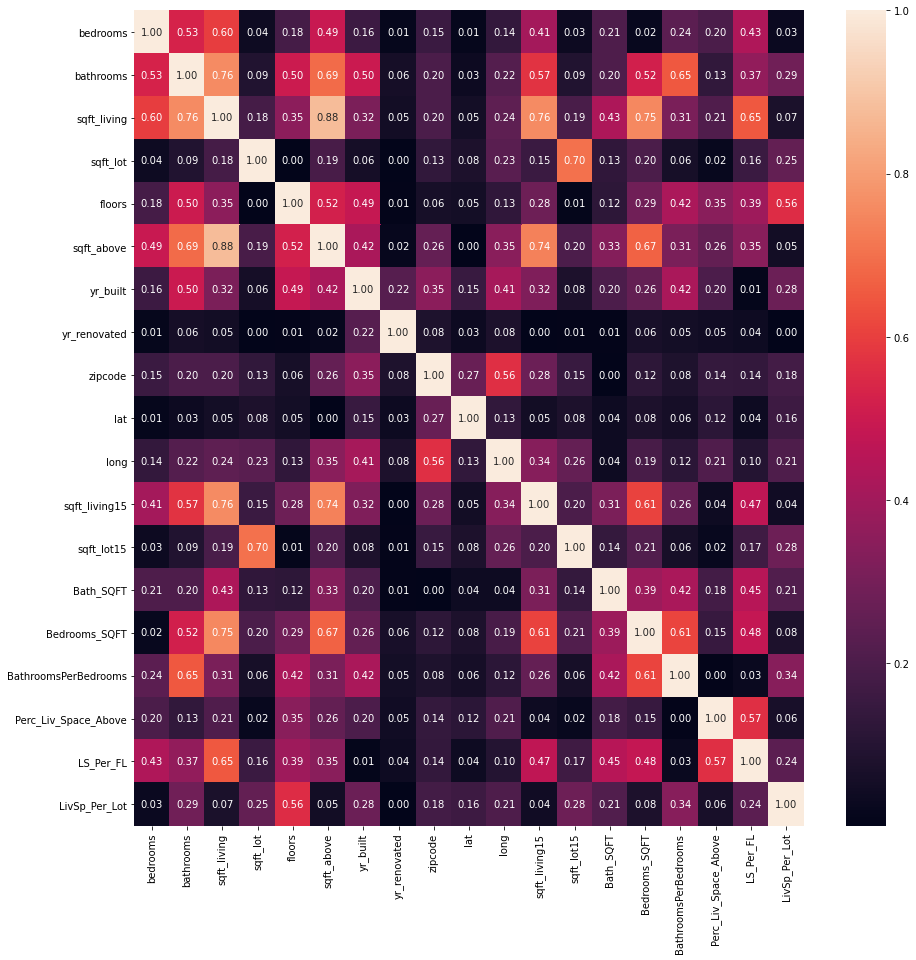

In [19]:
plt.figure(figsize = (15,15))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

<AxesSubplot:>

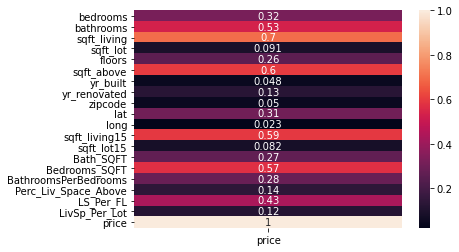

In [20]:
train_df = pd.concat([X_train, y_train], axis = 1)
sns.heatmap(train_df.corr()[['price']].abs(),annot=True)

## Talk about function

In [21]:
# Define function that evaluate the amount of error between model's predication and the actual values for both train and test set
def evaluate(y_tr, tr_preds, y_te, te_preds):
    '''
    Evaluate the amount of error between model's predication and the actual values for both train and test set
    
    Inputs:
    y_tr = array like, actual values for 'price' for my train dataset
    y_te = array like, actaul values for 'price' for my test dataset
    tr_preds = array like, predicted values for 'price' for my train dataset
    te_preds = array like, predicted values for 'price' for my test dataset
    '''
    
    print(f'Train R2: {r2_score(y_tr, tr_preds)}')
    print(f'Test R2: {r2_score(y_te, te_preds)}')
    print('****')
    print(f'Train RMSE: {mean_squared_error(y_tr, tr_preds,squared = False)}')
    print(f'Test RMSE: {mean_squared_error(y_te, te_preds,squared=False)}')
    print('****')
    print(f'Train MAE: {mean_absolute_error(y_tr, tr_preds)}')
    print(f'Test MAE: {mean_absolute_error(y_te, te_preds)}')
    
    # Calculate Residual
    train_residuals = y_tr-tr_preds
    test_residuals = y_te-te_preds
    
    # Display Scatter Plot for Residual
    plt.scatter(tr_preds, train_residuals, label='Train')
    plt.scatter(te_preds, test_residuals, label='Test')
    plt.axhline(y=0, color='red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.show()

## Baseline understanding

In [22]:
train_target_mean = y_train.mean()
train_target_mean

542036.6354435404

In [23]:
baseline_train_preds = [train_target_mean] * len(y_train)

baseline_test_preds = [train_target_mean] * len(y_test)

baseline_train_preds

[542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,
 542036.6354435404,


Train R2: 0.0
Test R2: -0.00025364584938625256
****
Train RMSE: 368717.15420135023
Test RMSE: 364186.90115591313
****
Train MAE: 235842.03996570347
Test MAE: 231347.94071899675


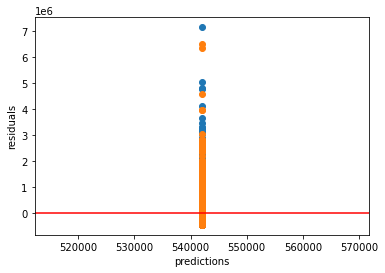

In [24]:
evaluate(y_train,baseline_train_preds,y_test,baseline_test_preds)

In [25]:
def fit_n_run(var):
    '''
    This function:
    1) defines the X_train and X_test
    2) runs fits and runs the model for the variable input with the y_train
    3) defines the predictors of the test and train set based on the model created
    4) returns model summary 
    Input:
    var - variable in form of str (single model), or the list of variable in form of str (multi)
    
    Output:
    Model Summary, Evaluation of error and r2 score
    '''
    xtr = X_train[var]
    #xte = X_test[var]
    model = sm.OLS(y_train,sm.add_constant(xtr)).fit()
    trpreds = model.predict(sm.add_constant(xtr))
    #tepreds = model.predict(sm.add_constant(xte))
    
    return model.summary()

Model 1.0

In [26]:
fit_n_run('sqft_living')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.465e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:34:00   Log-Likelihood:            -2.1009e+05
No. Observations:               15117   AIC:                         4.202e+05
Df Residuals:                   15115   BIC:                         4.202e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.311e+04   5285.915     -8.155      0.000   -5.35e+04   -3.27e+04
sqft_living   280.3702      2.316    121.033      0.000     275.830     284.911
==============================================================================
Omnibus:                     9707.719   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267176.166
Skew:                           2.649   Prob(JB):                         0.00
Kurtosis:                      22.902   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
train_df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Bath_SQFT', 'Bedrooms_SQFT',
       'BathroomsPerBedrooms', 'Perc_Liv_Space_Above', 'LS_Per_FL',
       'LivSp_Per_Lot', 'price'],
      dtype='object')

Model 1.1

In [28]:
fit_n_run('zipcode')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     38.54
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           5.49e-10
Time:                        19:34:00   Log-Likelihood:            -2.1520e+05
No. Observations:               15117   AIC:                         4.304e+05
Df Residuals:                   15115   BIC:                         4.304e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.458e+07   5.48e+06      6.307      0.000    2.38e+07    4.53e+07
zipcode     -347.0234     55.896     -6.208      0.000    -456.587    -237.460
==============================================================================
Omnibus:                    12706.053   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           585171.728
Skew:                           3.789   Prob(JB):                         0.00
Kurtosis:                      32.523   Cond. No.                     1.80e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X_train = train_df.drop(['price', 'bedrooms', 'bathrooms', 'sqft_above',
                         'BathroomsPerBedrooms', 'floors', 'LS_Per_FL', 'zipcode', 'sqft_living15', 'sqft_lot15',
                        'sqft_living'], axis=1)

<AxesSubplot:>

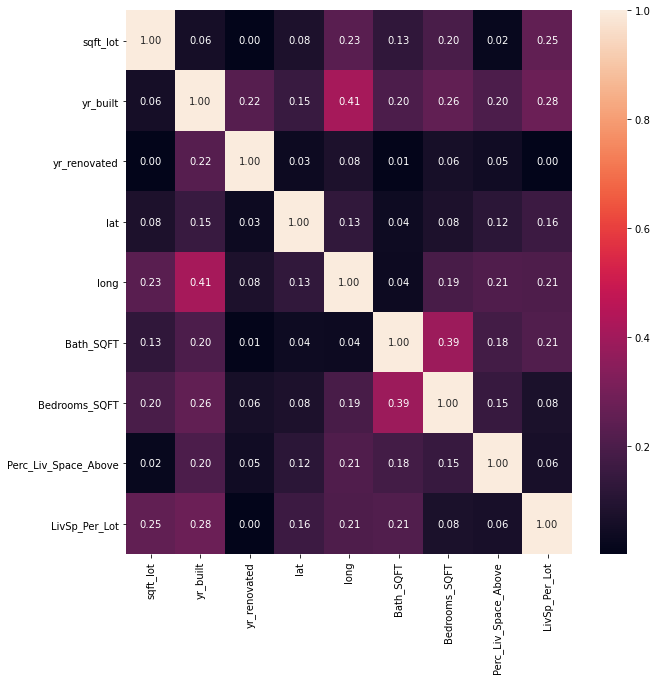

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

<AxesSubplot:>

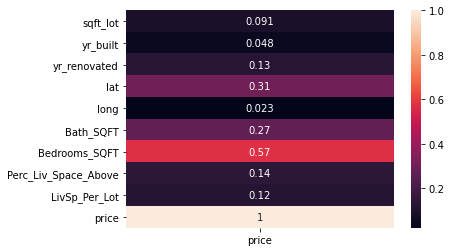

In [31]:
train_df = pd.concat([X_train, y_train], axis = 1)
sns.heatmap(train_df.corr()[['price']].abs(),annot=True)

### Model 1.2

In [32]:
fit_n_run('Bedrooms_SQFT')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     7401.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:34:01   Log-Likelihood:            -2.1220e+05
No. Observations:               15117   AIC:                         4.244e+05
Df Residuals:                   15115   BIC:                         4.244e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.272e+04   7446.880     -8.423      0.000   -7.73e+04   -4.81e+04
Bedrooms_SQFT   976.2291     11.348     86.028      0.000     953.986     998.472
==============================================================================
Omnibus:                    11207.045   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           504128.163
Skew:                           3.104   Prob(JB):                         0.00
Kurtosis:                      30.601   Cond. No.                     1.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
train_df.describe()

sqft_lot      yr_built  yr_renovated           lat          long  \
count  1.511700e+04  15117.000000  12418.000000  15117.000000  15117.000000   
mean   1.516938e+04   1971.090825     82.781285     47.560889   -122.213841   
std    4.106372e+04     29.339641    398.004042      0.138218      0.141493   
min    5.200000e+02   1900.000000      0.000000     47.155900   -122.519000   
25%    5.070000e+03   1952.000000      0.000000     47.471800   -122.329000   
50%    7.623000e+03   1975.000000      0.000000     47.573200   -122.231000   
75%    1.075400e+04   1997.000000      0.000000     47.678300   -122.125000   
max    1.651359e+06   2015.000000   2015.000000     47.777600   -121.315000   

          Bath_SQFT  Bedrooms_SQFT  Perc_Liv_Space_Above  LivSp_Per_Lot  \
count  15117.000000   15117.000000          15117.000000   15117.000000   
mean    1006.229010     619.483881              0.875116       0.324761   
std      292.287663     216.546748              0.171193       0.271378   
min      265.454545     200.000000              0.333333       0.000787   
25%      800.000000     470.000000              0.724719       0.155566   
50%      971.428571     577.500000              1.000000       0.247126   
75%     1167.272727     726.666667              1.000000       0.408428   
max     4600.000000    3000.000000              1.000000       4.653846   

              price  
count  1.511700e+04  
mean   5.420366e+05  
std    3.687294e+05  
min    7.800000e+04  
25%    3.240000e+05  
50%    4.500000e+05  
75%    6.455000e+05  
max    7.700000e+06

In [34]:
train_df.isna().sum()

date                       0
sqft_lot                   0
waterfront              1650
view                      44
condition                  0
grade                      0
sqft_basement              0
yr_built                   0
yr_renovated            2699
lat                        0
long                       0
Bath_SQFT                  0
Bedrooms_SQFT              0
Perc_Liv_Space_Above       0
LivSp_Per_Lot              0
price                      0
dtype: int64

### Dropping Columns
 - Getting rid of statistically insignificant data.

In [35]:
# Drop waterfront.
train_df['waterfront'].value_counts()

NO     13364
YES      103
Name: waterfront, dtype: int64

In [36]:
# Drop view.
train_df['view'].value_counts()

NONE         13610
AVERAGE        648
GOOD           356
FAIR           230
EXCELLENT      229
Name: view, dtype: int64

In [37]:
# Drop yr_renovated.
train_df['yr_renovated'].value_counts()

0.0       11903
2014.0       45
2005.0       24
2007.0       23
2003.0       22
          ...  
1950.0        1
1974.0        1
1971.0        1
1978.0        1
1951.0        1
Name: yr_renovated, Length: 66, dtype: int64

## Enter reasoning for dropping columns here.

In [38]:
train_df = train_df.drop(columns=['waterfront', 'view', 'yr_renovated'])
train_df.head()

date  sqft_lot condition         grade sqft_basement  yr_built  \
753    8/28/2014      6600   Average        8 Good           0.0      2010   
1418   4/15/2015     17186   Average  10 Very Good           0.0      1999   
8178    9/3/2014      6930   Average        8 Good           0.0      1994   
2254  11/12/2014      8750   Average     7 Average           0.0      1977   
4063   2/19/2015     12714   Average     7 Average           0.0      1959   

          lat     long   Bath_SQFT  Bedrooms_SQFT  Perc_Liv_Space_Above  \
753   47.7170 -122.020  952.000000    1190.000000                   1.0   
1418  47.5115 -122.246  850.666667     797.500000                   1.0   
8178  47.2621 -122.308  692.000000     576.666667                   1.0   
2254  47.1985 -122.001  935.000000     467.500000                   1.0   
4063  47.4859 -122.205  950.000000     356.250000                   1.0   

      LivSp_Per_Lot      price  
753        0.360606   699800.0  
1418       0.185616  1700000.0  
8178       0.249639   258000.0  
2254       0.213714   245000.0  
4063       0.224162   373000.0

In [39]:
train_df = train_df.drop(columns=['grade'])
train_df.head()

date  sqft_lot condition sqft_basement  yr_built      lat  \
753    8/28/2014      6600   Average           0.0      2010  47.7170   
1418   4/15/2015     17186   Average           0.0      1999  47.5115   
8178    9/3/2014      6930   Average           0.0      1994  47.2621   
2254  11/12/2014      8750   Average           0.0      1977  47.1985   
4063   2/19/2015     12714   Average           0.0      1959  47.4859   

         long   Bath_SQFT  Bedrooms_SQFT  Perc_Liv_Space_Above  LivSp_Per_Lot  \
753  -122.020  952.000000    1190.000000                   1.0       0.360606   
1418 -122.246  850.666667     797.500000                   1.0       0.185616   
8178 -122.308  692.000000     576.666667                   1.0       0.249639   
2254 -122.001  935.000000     467.500000                   1.0       0.213714   
4063 -122.205  950.000000     356.250000                   1.0       0.224162   

          price  
753    699800.0  
1418  1700000.0  
8178   258000.0  
2254   245000.0  
4063   373000.0

In [40]:
# Conditioning categorical value to numerical.
condition_replace = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}

train_df["condition"].replace(condition_replace, inplace=True)

In [41]:
train_df.describe()

sqft_lot     condition      yr_built           lat          long  \
count  1.511700e+04  15117.000000  15117.000000  15117.000000  15117.000000   
mean   1.516938e+04      2.409208   1971.090825     47.560889   -122.213841   
std    4.106372e+04      0.650820     29.339641      0.138218      0.141493   
min    5.200000e+02      0.000000   1900.000000     47.155900   -122.519000   
25%    5.070000e+03      2.000000   1952.000000     47.471800   -122.329000   
50%    7.623000e+03      2.000000   1975.000000     47.573200   -122.231000   
75%    1.075400e+04      3.000000   1997.000000     47.678300   -122.125000   
max    1.651359e+06      4.000000   2015.000000     47.777600   -121.315000   

          Bath_SQFT  Bedrooms_SQFT  Perc_Liv_Space_Above  LivSp_Per_Lot  \
count  15117.000000   15117.000000          15117.000000   15117.000000   
mean    1006.229010     619.483881              0.875116       0.324761   
std      292.287663     216.546748              0.171193       0.271378   
min      265.454545     200.000000              0.333333       0.000787   
25%      800.000000     470.000000              0.724719       0.155566   
50%      971.428571     577.500000              1.000000       0.247126   
75%     1167.272727     726.666667              1.000000       0.408428   
max     4600.000000    3000.000000              1.000000       4.653846   

              price  
count  1.511700e+04  
mean   5.420366e+05  
std    3.687294e+05  
min    7.800000e+04  
25%    3.240000e+05  
50%    4.500000e+05  
75%    6.455000e+05  
max    7.700000e+06

## Normalizing the Data.
 - Log transformation.

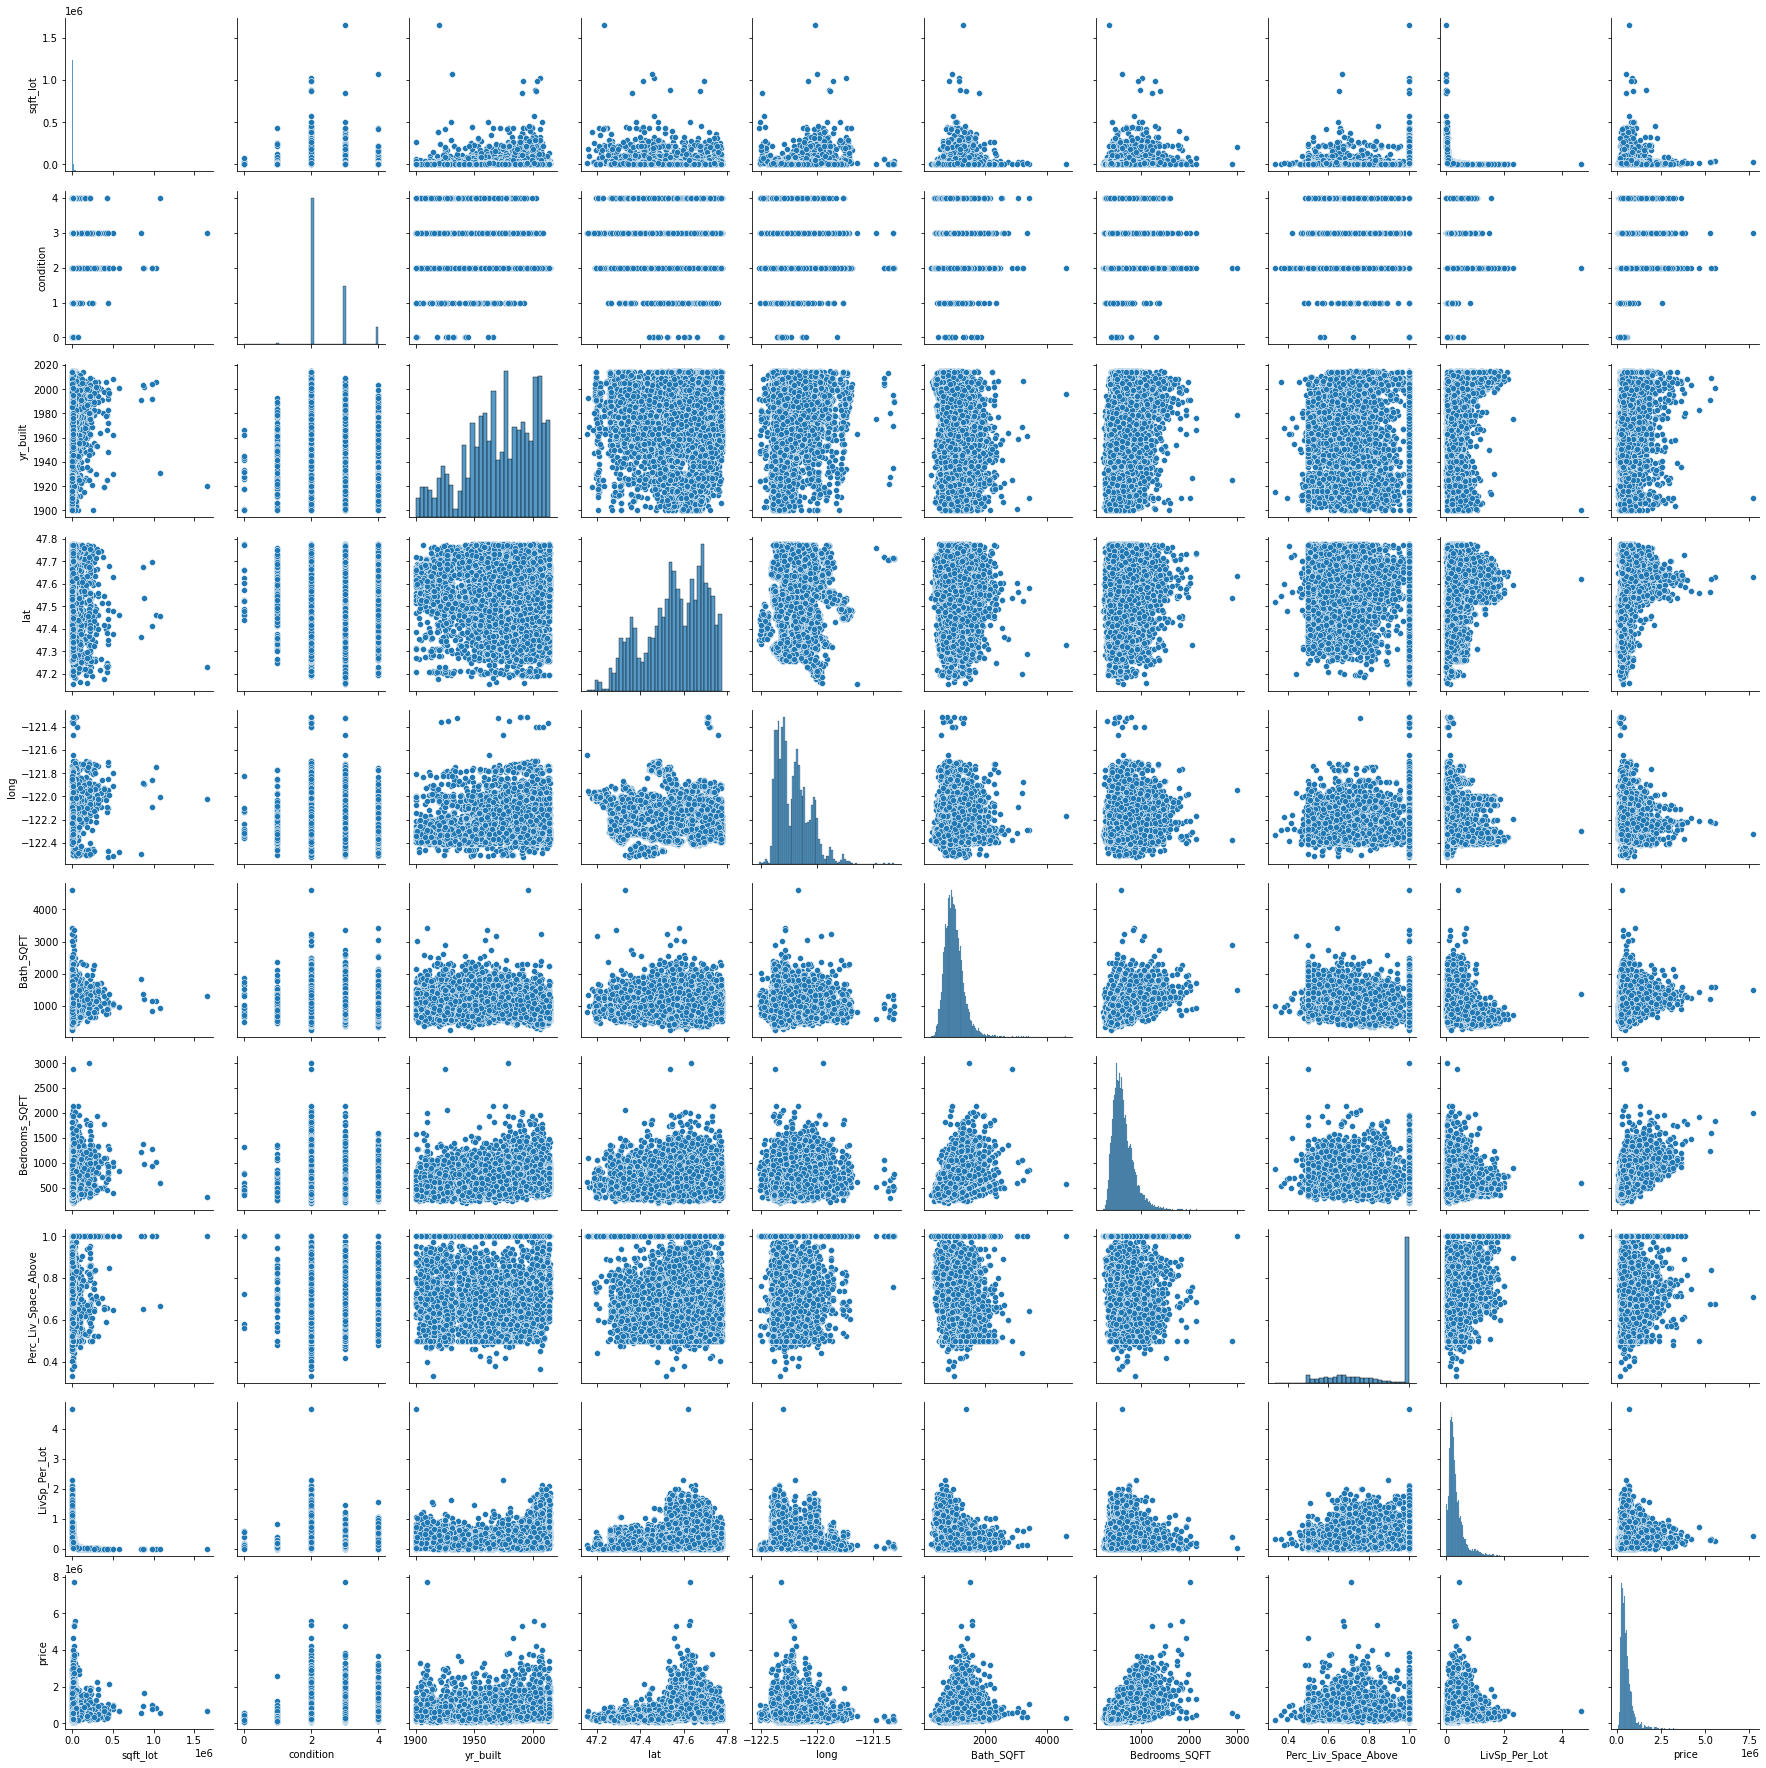

In [42]:
sns.pairplot(train_df)

In [43]:
train_df['log_livsplot'] = np.log(train_df['LivSp_Per_Lot'])
train_df['log_sqft_lot'] = np.log(train_df['sqft_lot'])
train_df['log_price'] = np.log(train_df['price'])
train_df['log_bath_sqft'] = np.log(train_df['Bath_SQFT'])
train_df['log_bed_sqft'] = np.log(train_df['Bedrooms_SQFT'])
train_df = train_df.drop(['price', 'Bedrooms_SQFT', 'sqft_lot', 'Bath_SQFT', 'LivSp_Per_Lot'], axis = 1)

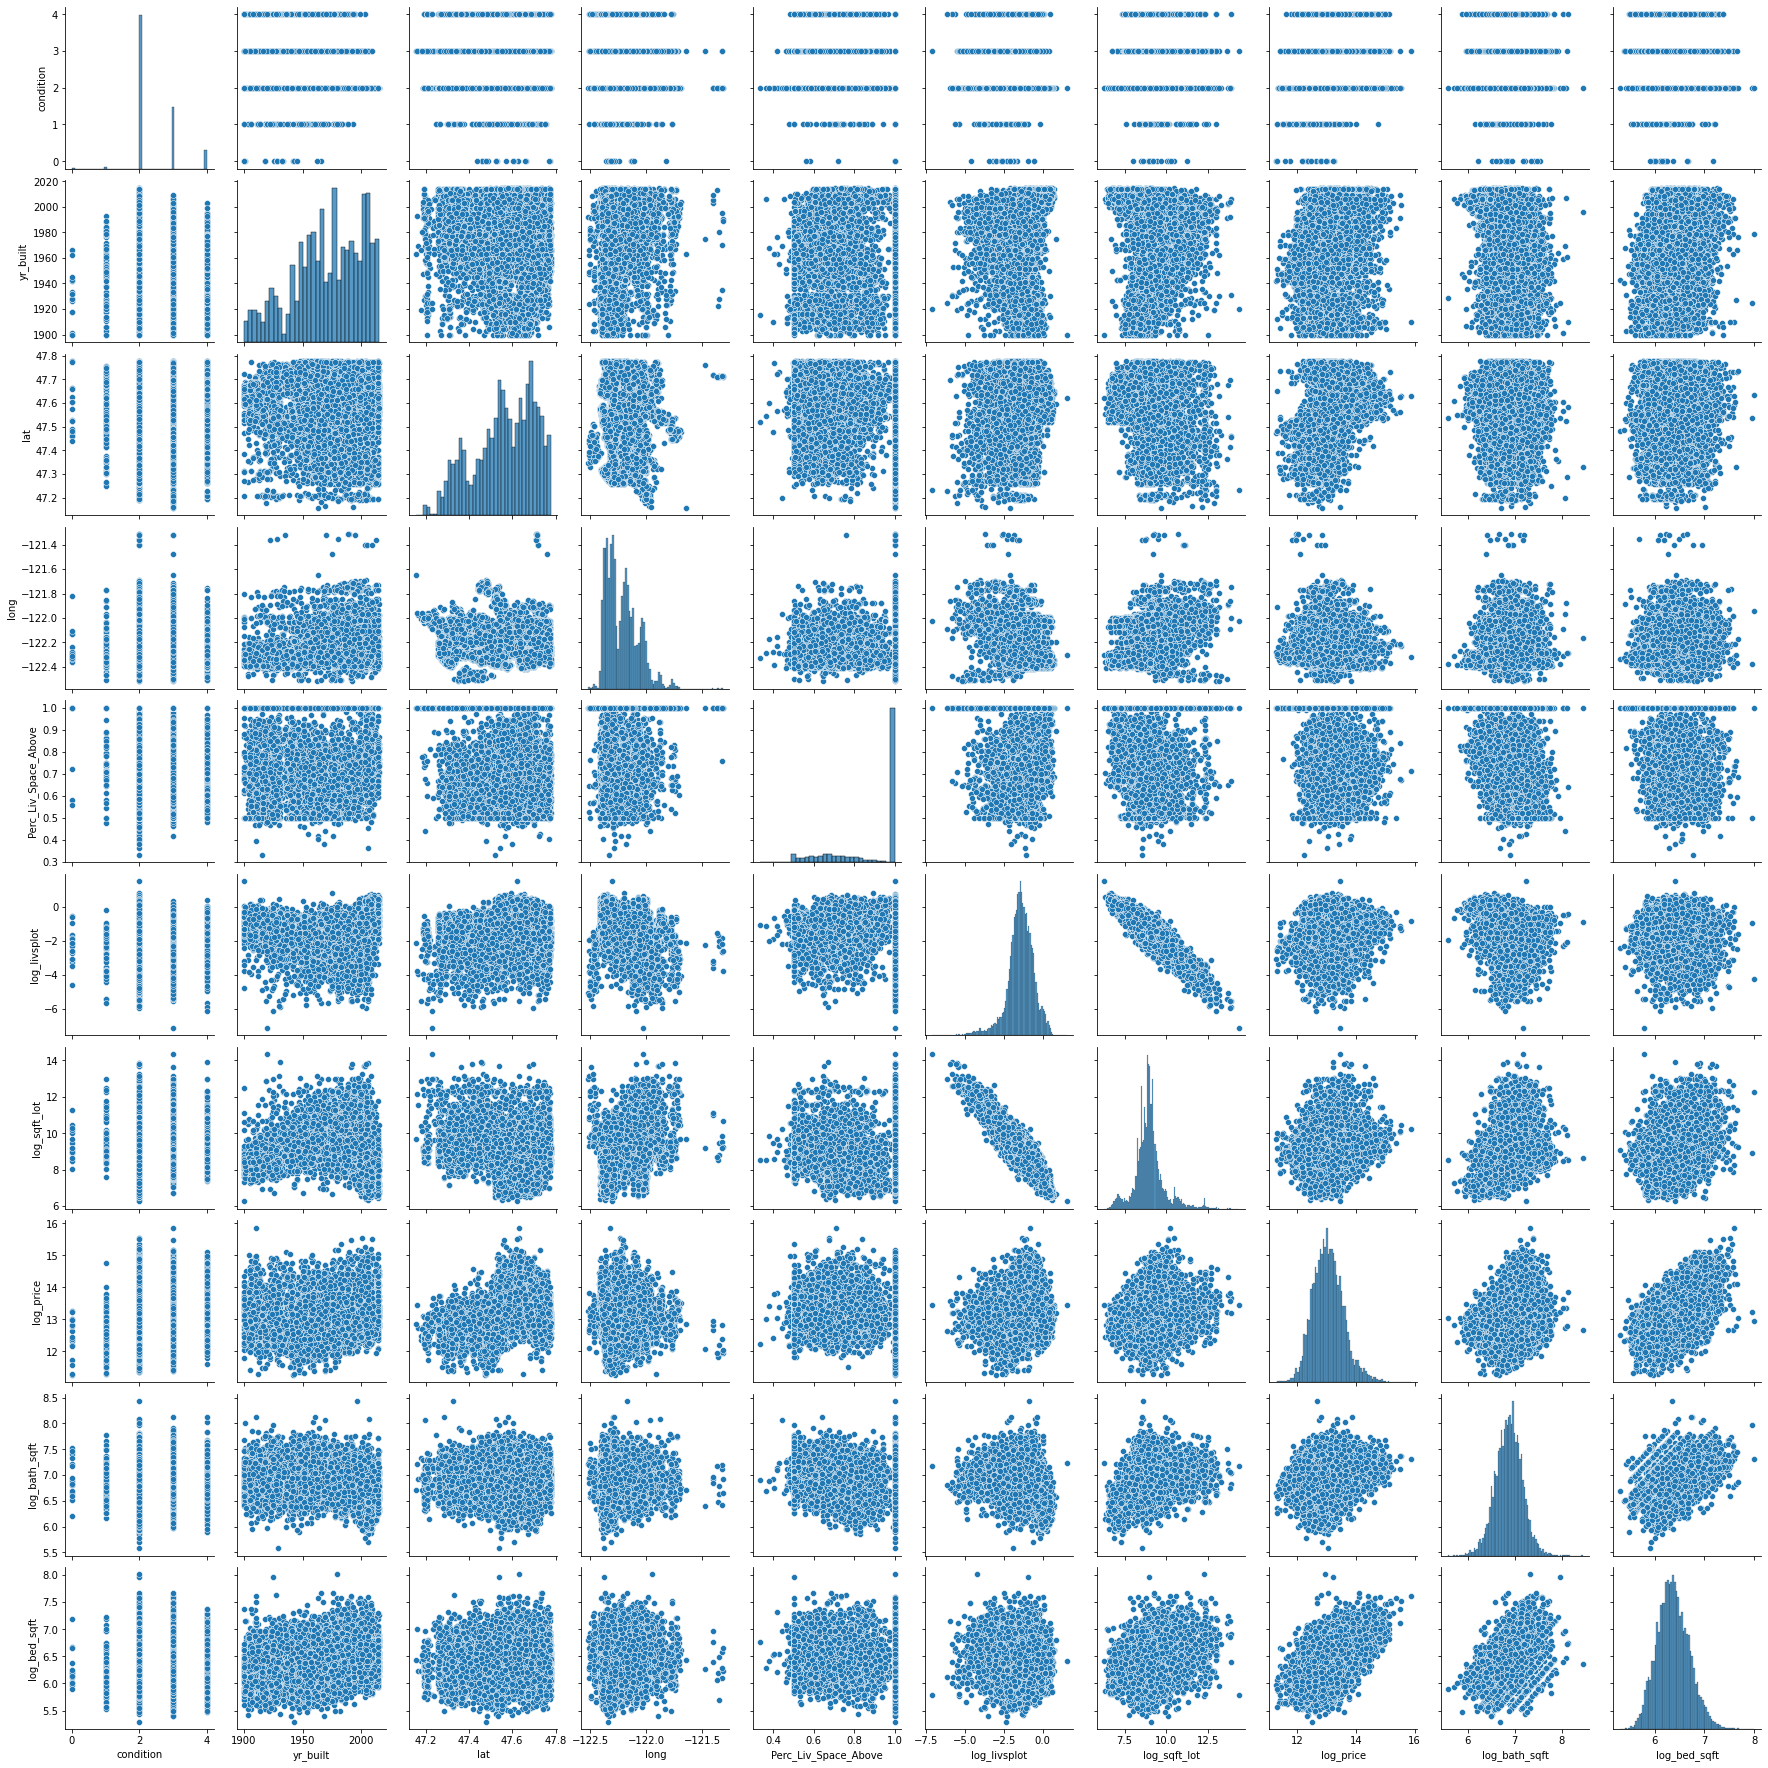

In [44]:
sns.pairplot(train_df)

In [45]:
train_df = train_df.loc[train_df['log_sqft_lot'] <= train_df['log_sqft_lot'].mean() + 3 * train_df['log_sqft_lot'].std()]
train_df = train_df.loc[train_df['log_sqft_lot'] >= train_df['log_sqft_lot'].mean() - 3 * train_df['log_sqft_lot'].std()]
train_df = train_df.loc[train_df['log_price'] <= train_df['log_price'].mean() + 3 * train_df['log_price'].std()]
train_df = train_df.loc[train_df['log_price'] >= train_df['log_price'].mean() - 3 * train_df['log_price'].std()]
train_df = train_df.loc[train_df['log_bath_sqft'] <= train_df['log_bath_sqft'].mean() + 3 * train_df['log_bath_sqft'].std()]
train_df = train_df.loc[train_df['log_bath_sqft'] >= train_df['log_bath_sqft'].mean() - 3 * train_df['log_bath_sqft'].std()]
train_df = train_df.loc[train_df['log_bed_sqft'] <= train_df['log_bed_sqft'].mean() + 3 * train_df['log_bed_sqft'].std()]
train_df = train_df.loc[train_df['log_bed_sqft'] >= train_df['log_bed_sqft'].mean() - 3 * train_df['log_bed_sqft'].std()]
train_df = train_df.loc[train_df['log_livsplot'] <= train_df['log_livsplot'].mean() + 3 * train_df['log_livsplot'].std()]
train_df = train_df.loc[train_df['log_livsplot'] >= train_df['log_livsplot'].mean() - 3 * train_df['log_livsplot'].std()]


train_df.describe()

condition      yr_built           lat          long  \
count  14473.000000  14473.000000  14473.000000  14473.000000   
mean       2.413045   1970.874525     47.562324   -122.217710   
std        0.649489     29.345152      0.137638      0.138003   
min        0.000000   1900.000000     47.155900   -122.509000   
25%        2.000000   1951.000000     47.474500   -122.330000   
50%        2.000000   1974.000000     47.574400   -122.237000   
75%        3.000000   1997.000000     47.679300   -122.130000   
max        4.000000   2015.000000     47.777600   -121.315000   

       Perc_Liv_Space_Above  log_livsplot  log_sqft_lot     log_price  \
count          14473.000000  14473.000000  14473.000000  14473.000000   
mean               0.874623     -1.368394      8.911499     13.034640   
std                0.171671      0.730266      0.757827      0.500938   
min                0.333333     -3.675634      6.558198     11.561716   
25%                0.722628     -1.820432      8.518193     12.676076   
50%                1.000000     -1.382380      8.922658     13.015286   
75%                1.000000     -0.886732      9.232591     13.361380   
max                1.000000      0.829163     11.686189     14.626441   

       log_bath_sqft  log_bed_sqft  
count   14473.000000  14473.000000  
mean        6.868084      6.362749  
std         0.274101      0.309493  
min         6.033429      5.473670  
25%         6.684612      6.145615  
50%         6.872868      6.351467  
75%         7.056175      6.569949  
max         7.714231      7.306531

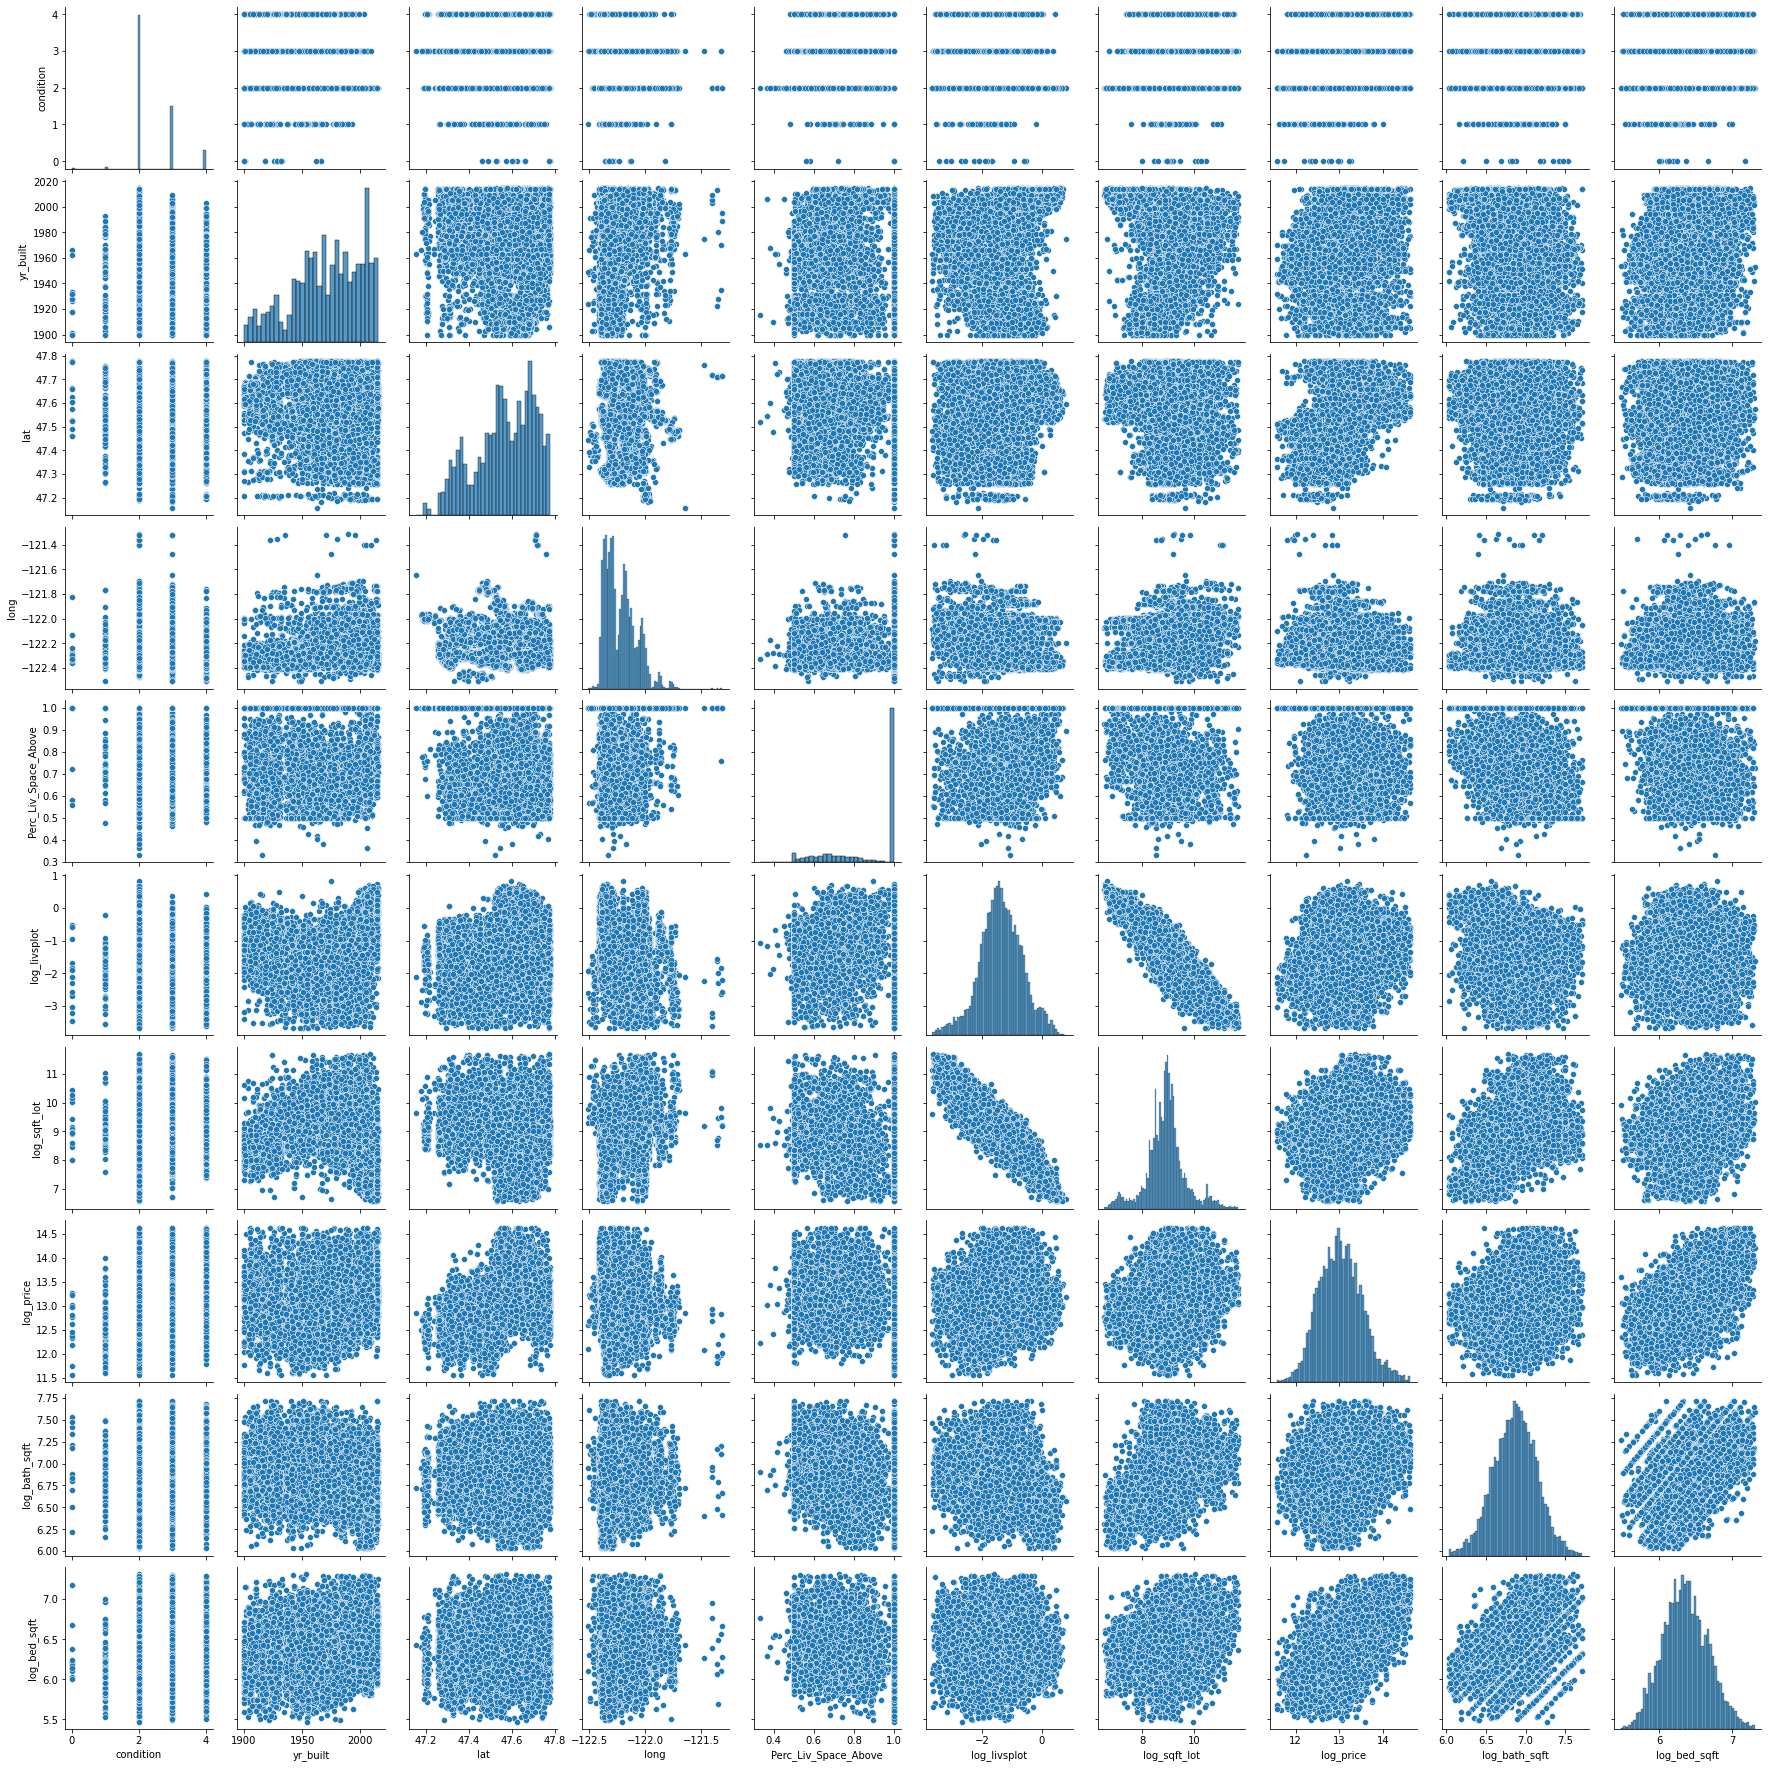

In [46]:
sns.pairplot(train_df)

<AxesSubplot:>

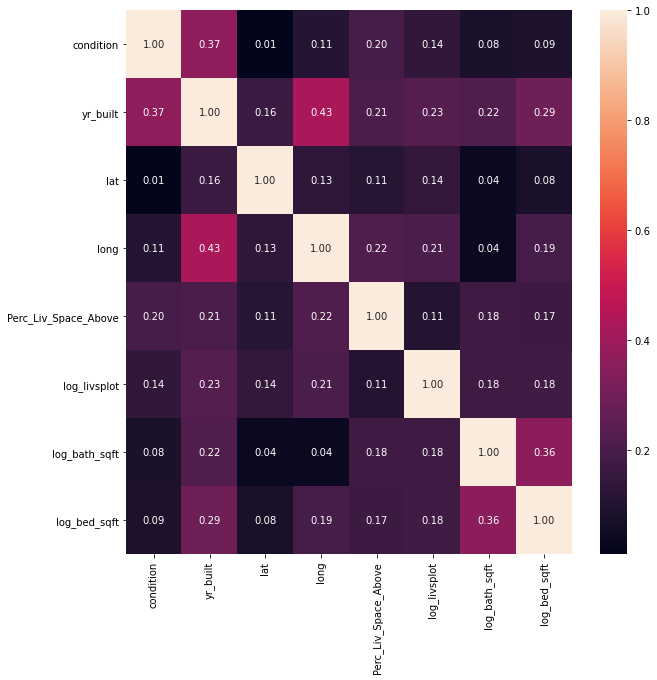

In [47]:
X_train = train_df.drop(columns=['log_price', 'log_sqft_lot'])
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr().abs(), annot = True, fmt='.2f')

In [54]:
X_train = X_train.drop(columns=['date'])

KeyError: "['date'] not found in axis"

In [55]:
y_train = train_df['log_price']

In [56]:
X_train

condition  yr_built      lat     long  Perc_Liv_Space_Above  \
753            2      2010  47.7170 -122.020                   1.0   
1418           2      1999  47.5115 -122.246                   1.0   
8178           2      1994  47.2621 -122.308                   1.0   
2254           2      1977  47.1985 -122.001                   1.0   
4063           2      1959  47.4859 -122.205                   1.0   
...          ...       ...      ...      ...                   ...   
11964          2      2004  47.5308 -121.847                   1.0   
21575          2      2014  47.5001 -122.232                   1.0   
5390           3      1976  47.6492 -121.908                   1.0   
860            2      1963  47.4810 -122.323                   1.0   
15795          2      2001  47.7394 -121.965                   1.0   

       log_livsplot  log_bath_sqft  log_bed_sqft  
753       -1.019969       6.858565      7.081709  
1418      -1.684074       6.746020      6.681482  
8178      -1.387738       6.539586      6.357264  
2254      -1.543115       6.840547      6.147399  
4063      -1.495385       6.856462      5.875633  
...             ...            ...           ...  
11964     -0.955856       6.793466      6.611145  
21575     -0.329745       6.915002      6.540308  
5390      -1.771957       6.927558      5.946729  
860       -3.675634       6.227853      5.940171  
15795     -1.438622       7.004882      6.534878  

[14473 rows x 8 columns]

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14473 entries, 753 to 15795
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   condition             14473 non-null  int64  
 1   yr_built              14473 non-null  int64  
 2   lat                   14473 non-null  float64
 3   long                  14473 non-null  float64
 4   Perc_Liv_Space_Above  14473 non-null  float64
 5   log_livsplot          14473 non-null  float64
 6   log_bath_sqft         14473 non-null  float64
 7   log_bed_sqft          14473 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1017.6 KB


In [58]:
X_train = X_train.drop(columns=['sqft_basement'])

KeyError: "['sqft_basement'] not found in axis"

In [59]:
X_train

condition  yr_built      lat     long  Perc_Liv_Space_Above  \
753            2      2010  47.7170 -122.020                   1.0   
1418           2      1999  47.5115 -122.246                   1.0   
8178           2      1994  47.2621 -122.308                   1.0   
2254           2      1977  47.1985 -122.001                   1.0   
4063           2      1959  47.4859 -122.205                   1.0   
...          ...       ...      ...      ...                   ...   
11964          2      2004  47.5308 -121.847                   1.0   
21575          2      2014  47.5001 -122.232                   1.0   
5390           3      1976  47.6492 -121.908                   1.0   
860            2      1963  47.4810 -122.323                   1.0   
15795          2      2001  47.7394 -121.965                   1.0   

       log_livsplot  log_bath_sqft  log_bed_sqft  
753       -1.019969       6.858565      7.081709  
1418      -1.684074       6.746020      6.681482  
8178      -1.387738       6.539586      6.357264  
2254      -1.543115       6.840547      6.147399  
4063      -1.495385       6.856462      5.875633  
...             ...            ...           ...  
11964     -0.955856       6.793466      6.611145  
21575     -0.329745       6.915002      6.540308  
5390      -1.771957       6.927558      5.946729  
860       -3.675634       6.227853      5.940171  
15795     -1.438622       7.004882      6.534878  

[14473 rows x 8 columns]

In [61]:
fit_n_run(list(X_train.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     2051.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:37:31   Log-Likelihood:                -5044.8
No. Observations:               14473   AIC:                         1.011e+04
Df Residuals:                   14464   BIC:                         1.018e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -41.1308      3.340    -12.315      0.000     -47.678     -34.584
condition                0.0786      0.005     16.372      0.000       0.069       0.088
yr_built                -0.0002      0.000     -1.211      0.226      -0.000    9.96e-05
lat                      1.5151      0.022     70.142      0.000       1.473       1.557
long                     0.1936      0.025      7.790      0.000       0.145       0.242
Perc_Liv_Space_Above    -0.0053      0.018     -0.292      0.770      -0.041       0.030
log_livsplot             0.1015      0.004     22.671      0.000       0.093       0.110
log_bath_sqft            0.1712      0.012     13.977      0.000       0.147       0.195
log_bed_sqft             0.7648      0.011     67.820      0.000       0.743       0.787
==============================================================================
Omnibus:                      263.405   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.296
Skew:                           0.185   Prob(JB):                     1.79e-90
Kurtosis:                       3.741   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
X_train = X_train.drop(columns=['Perc_Liv_Space_Above', 'yr_built'])

In [64]:
fit_n_run(list(X_train.columns))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     2734.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:39:26   Log-Likelihood:                -5045.6
No. Observations:               14473   AIC:                         1.011e+04
Df Residuals:                   14466   BIC:                         1.016e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -43.4988      2.785    -15.616      0.000     -48.959     -38.039
condition         0.0807      0.004     17.945      0.000       0.072       0.089
lat               1.5207      0.021     71.927      0.000       1.479       1.562
long              0.1792      0.022      8.084      0.000       0.136       0.223
log_livsplot      0.1003      0.004     23.208      0.000       0.092       0.109
log_bath_sqft     0.1761      0.012     15.139      0.000       0.153       0.199
log_bed_sqft      0.7614      0.011     71.755      0.000       0.741       0.782
==============================================================================
Omnibus:                      266.145   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.199
Skew:                           0.191   Prob(JB):                     1.88e-90
Kurtosis:                       3.735   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ask About the nonsense below!

In [65]:
#sc = StandardScaler()
#X_train_scaled = sc.fit_transform(X_train)
#X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

In [68]:
# Instantiating our scaler
stdscaler = StandardScaler()
# Creating scaled versions 
train_scaled = stdscaler.fit_transform(X_train)

In [70]:
fit_n_run(list(train_scaled.columns))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'